In [1]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.integrate import odeint

In [2]:
def line(x,a,b):
    return a*x+b

In [3]:
x=np.linspace(0,10,21)

#choose parameters
par_0=[5.0,3.0]

y=line(x,par_0[0],par_0[1])

In [4]:
#Adding random scatter to data

noise=30*(np.random.random(len(x))-0.5)*2.0
ynoise=y+noise

In [5]:
#Adding error with NORMAL distribution

error_y=10*(np.random.normal(0,1,size=len(x)))
error_x=2*(np.random.normal(0,1,size=len(x)))

In [6]:
#make a function that performs Monte Carlo Fitting as a function of N
#returns the median and standard deviation of parameters

def MonteCarloFit(N):
    a=[]
    b=[]

    for i in range(N):
        x_i=x+(np.random.random()-0.5)*2.0*error_x
        y_i=ynoise+(np.random.random()-0.5)*2.0*error_y
    
        popt,pcov=curve_fit(line,x_i,y_i)
        a=np.append(a,popt[0])
        b=np.append(b,popt[1])
    
    #taking the median and standard deviation of parameters from the fitting
    med_a=np.median(a)
    med_b=np.median(b)
    std_a=np.std(a)
    std_b=np.std(b)
    
    return [med_a,med_b,std_a,std_b]




#Calculate Monte Carlo Fit parameters for N=10,100,1000
par_10=MonteCarloFit(10)
par_100=MonteCarloFit(100)
par_1000=MonteCarloFit(1000)




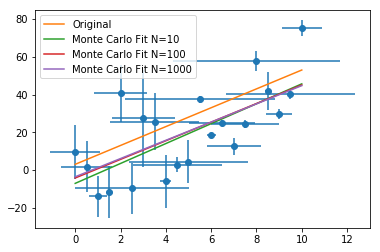

In [7]:
#plot the noisy data generated, with error bars
plt.errorbar(x,ynoise,xerr=error_x,yerr=error_y,marker='o', fmt='o')

#plot the line with original parameters
plt.plot(x,line(x,par_0[0],par_0[1]), label="Original")

#plot the line with the Monte Carlo Fit parameteres
plt.plot(x,line(x,par_10[0],par_10[1]), label="Monte Carlo Fit N=10")
plt.plot(x,line(x,par_100[0],par_100[1]), label="Monte Carlo Fit N=100")
plt.plot(x,line(x,par_1000[0],par_1000[1]), label="Monte Carlo Fit N=1000")
plt.legend()
plt.show()

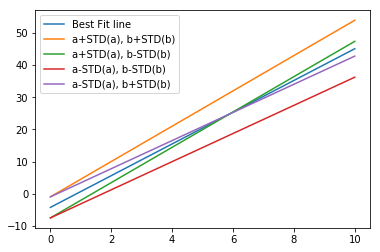

In [8]:
#Plotting the Best fit line from Monte Carlo Fit with N=100

plt.plot(x,line(x,par_100[0],par_100[1]),label="Best Fit line")

#Plotting the best fit line with +/- one standard deviations in parameters
plt.plot(x,line(x,par_100[0]+par_100[2],par_100[1]+par_100[3]), label="a+STD(a), b+STD(b)")
plt.plot(x,line(x,par_100[0]+par_100[2],par_100[1]-par_100[3]), label="a+STD(a), b-STD(b)")
plt.plot(x,line(x,par_100[0]-par_100[2],par_100[1]-par_100[3]), label="a-STD(a), b-STD(b)")
plt.plot(x,line(x,par_100[0]-par_100[2],par_100[1]+par_100[3]), label="a-STD(a), b+STD(b)")
plt.legend()

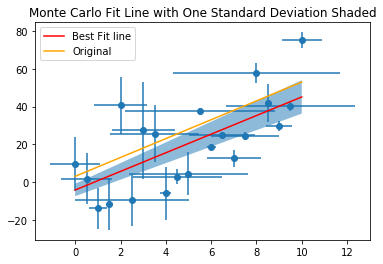

In [9]:
#Plotting the Best fit line from Monte Carlo Fit with N=100

plt.plot(x,line(x,par_100[0],par_100[1]),label="Best Fit line", color="red")

#plot the line with original parameters
plt.plot(x,line(x,par_0[0],par_0[1]), label="Original", color='orange')

#Fill between one standard deviation from the best fit line
above=[par_100[0]+par_100[2],par_100[1]+par_100[3]]
below=[par_100[0]-par_100[2],par_100[1]-par_100[3]]

plt.fill_between(x,line(x,above[0],above[1]),line(x,below[0],below[1]), alpha=0.5)
plt.title("Monte Carlo Fit Line with One Standard Deviation Shaded")
plt.errorbar(x,ynoise,xerr=error_x,yerr=error_y,marker='o', fmt='o')
plt.legend()
plt.show()
